In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import requests
import json

from sqlalchemy import create_engine
import psycopg2 
import io
from config import AWS

In [2]:
engine = create_engine(AWS)

Employment_by_County_df = pd.read_sql('employ_county', engine)
Employment_by_County_df

,index,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
0,0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
1,1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
2,2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
3,3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
4,4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3120,56037,"Sweetwater County, Wyoming",20840,19308,1532,7.4,42272,34389,366,433,295,70,2508,4211
3121,3121,56039,"Teton County, Wyoming",15204,14292,912,6.0,23331,19202,55,185,317,5,1415,2152
3122,3122,56041,"Uinta County, Wyoming",9312,8730,582,6.3,20450,18007,66,191,114,27,864,1181
3123,3123,56043,"Washakie County, Wyoming",4004,3793,211,5.3,7685,6600,12,77,33,3,388,572


In [3]:
# Employment_by_County_df  = pd.read_csv('../data_files/Employment_by_County.csv')
# Employment_by_County_df.head(5)

In [4]:
Employment_by_County_df_copy =Employment_by_County_df.copy()

In [5]:

Employment_by_County_df_copy["state"]= Employment_by_County_df_copy['county'].str.split(",").str[1]

In [6]:
Employment_by_County_df_copy.head()

,index,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
0,0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama
1,1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama
2,2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama
3,3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama
4,4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama


In [7]:
#Employment_by_County_df_copy.to_csv('..//data_files/Employment_by_County_with_state.csv')

In [8]:
Employment_by_County_with_state_df  = pd.read_csv('../data_files/Employment_by_County_with_state.csv')
Employment_by_County_with_state_df.head()

,index,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
0,0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama
1,1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama
2,2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama
3,3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama
4,4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama


In [10]:
#Employment_by_County_with_state_df.drop('Unnamed: 0',axis=1)

# Total number of counties in the data

In [11]:
# Number of counties 
total_county=len(Employment_by_County_df["county"].unique())
total_county


3125

In [12]:
#Average Unemployement
Avg_Unemployment = Employment_by_County_df.groupby(["county"]).mean()["unemployed"]
Avg_Unemployment

county
Abbeville County, South Carolina      670.0
Acadia Parish, Louisiana             1705.0
Accomack County, Virginia            1041.0
Ada County, Idaho                   13893.0
Adair County, Iowa                    166.0
                                     ...   
Yuma County, Arizona                16810.0
Yuma County, Colorado                 159.0
Zapata County, Texas                  571.0
Zavala County, Texas                  484.0
Ziebach County, South Dakota           45.0
Name: unemployed, Length: 3125, dtype: float64

# which counties has highest_Unemployment 

In [13]:
Avg_Unemployment.sort_values(ascending=False)

county
Los Angeles County, California    629811.0
Cook County, Illinois             281454.0
Harris County, Texas              204310.0
Maricopa County, Arizona          172361.0
Clark County, Nevada              165513.0
                                    ...   
Petroleum County, Montana              9.0
Blaine County, Nebraska                9.0
Grant County, Nebraska                 8.0
Loving County, Texas                   5.0
King County, Texas                     4.0
Name: unemployed, Length: 3125, dtype: float64

In [14]:
#TOP 10 county with high unemployed 
high_Unemployment=Avg_Unemployment.nlargest(15)
high_Unemployment

county
Los Angeles County, California    629811.0
Cook County, Illinois             281454.0
Harris County, Texas              204310.0
Maricopa County, Arizona          172361.0
Clark County, Nevada              165513.0
Kings County, New York            144278.0
San Diego County, California      141814.0
Queens County, New York           137723.0
Orange County, California         136563.0
Wayne County, Michigan            110086.0
Riverside County, California      109998.0
Dallas County, Texas              103841.0
Miami-Dade County, Florida        103681.0
King County, Washington            96440.0
Bronx County, New York             94436.0
Name: unemployed, dtype: float64

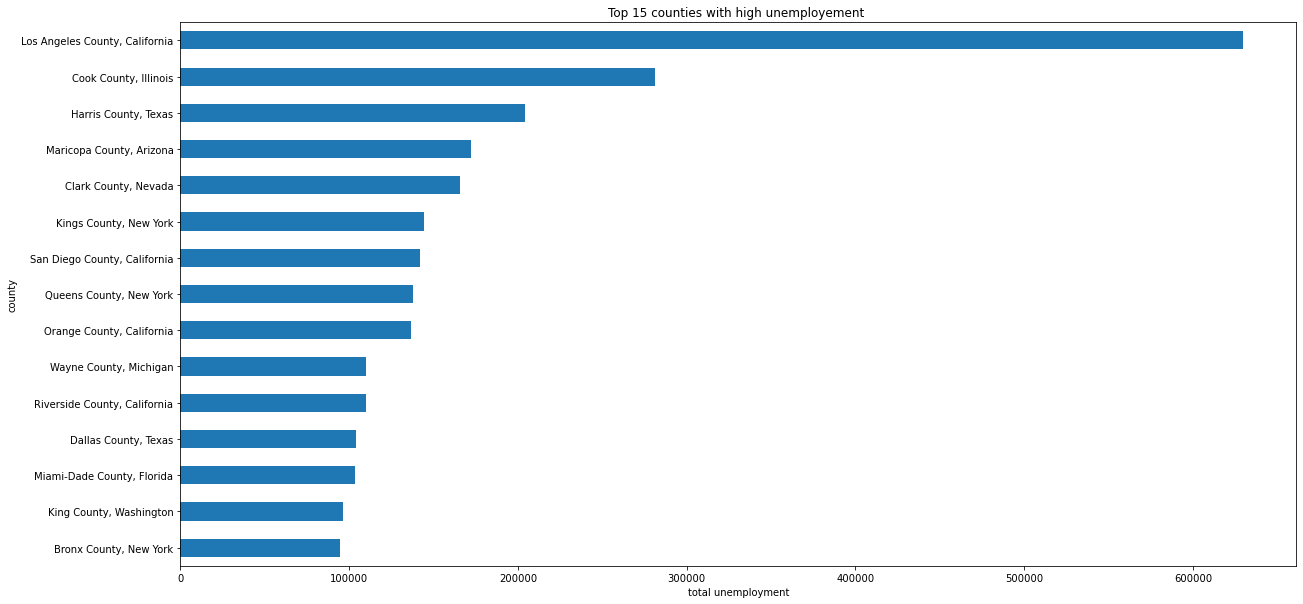

<Figure size 432x288 with 0 Axes>

In [15]:
# Bar chart for top couties with high unemployement rate

high_Unemployment.sort_values().plot(kind="barh",figsize=(20,10))
plt.title("Top 15 counties with high unemployement ") 
plt.ylabel("county")
plt.xlabel("total unemployment")
plt.show()
plt.tight_layout()


# Which counties have lowest_Unemployment 

In [16]:
#Low unemployement
low_Unemployment = Avg_Unemployment.nsmallest(15)
low_Unemployment

county
King County, Texas             4.0
Loving County, Texas           5.0
Grant County, Nebraska         8.0
Blaine County, Nebraska        9.0
Petroleum County, Montana      9.0
Banner County, Nebraska       10.0
Kenedy County, Texas          10.0
Wheeler County, Nebraska      10.0
Hooker County, Nebraska       11.0
Arthur County, Nebraska       12.0
Harding County, New Mexico    12.0
Keya Paha County, Nebraska    12.0
Logan County, Nebraska        12.0
Loup County, Nebraska         12.0
McPherson County, Nebraska    12.0
Name: unemployed, dtype: float64

In [17]:
low_Unemployment.sort_values(ascending=True)

county
King County, Texas             4.0
Loving County, Texas           5.0
Grant County, Nebraska         8.0
Blaine County, Nebraska        9.0
Petroleum County, Montana      9.0
Banner County, Nebraska       10.0
Kenedy County, Texas          10.0
Wheeler County, Nebraska      10.0
Hooker County, Nebraska       11.0
Arthur County, Nebraska       12.0
Harding County, New Mexico    12.0
Keya Paha County, Nebraska    12.0
Logan County, Nebraska        12.0
Loup County, Nebraska         12.0
McPherson County, Nebraska    12.0
Name: unemployed, dtype: float64

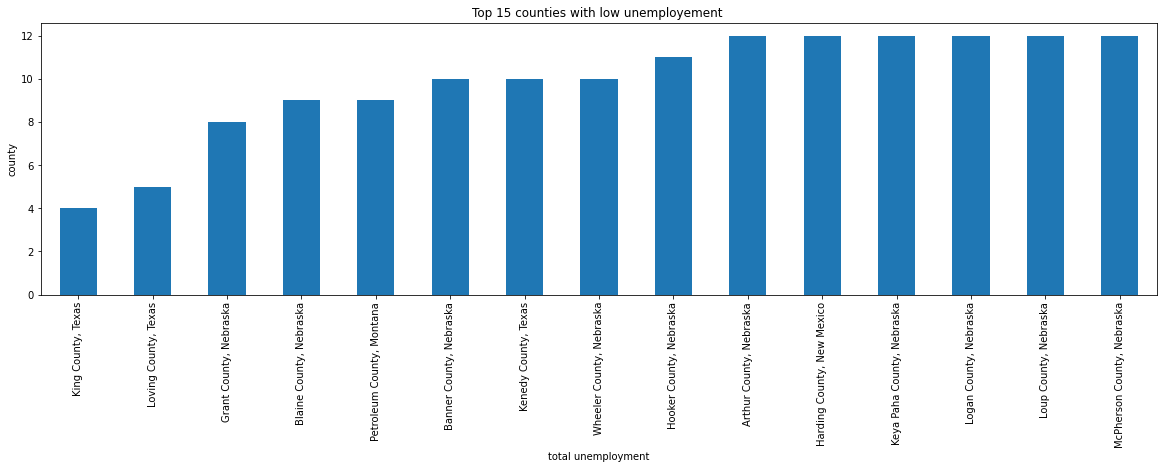

<Figure size 432x288 with 0 Axes>

In [18]:

low_Unemployment.plot(kind="bar",figsize=(20,5))
plt.title("Top 15 counties with low unemployement ") 
plt.ylabel("county")
plt.xlabel("total unemployment")
plt.show()
plt.tight_layout()


# counties with high employement

In [19]:
#Average employement
Avg_employment = Employment_by_County_df.groupby(["county"]).mean()["employed"]
Avg_employment

county
Abbeville County, South Carolina      9454.0
Acadia Parish, Louisiana             21758.0
Accomack County, Virginia            15011.0
Ada County, Idaho                   243784.0
Adair County, Iowa                    4013.0
                                      ...   
Yuma County, Arizona                 81310.0
Yuma County, Colorado                 5445.0
Zapata County, Texas                  4029.0
Zavala County, Texas                  2946.0
Ziebach County, South Dakota           899.0
Name: employed, Length: 3125, dtype: float64

In [20]:
Avg_employment.sort_values(ascending=False)

county
Los Angeles County, California    4291688.0
Cook County, Illinois             2258453.0
Maricopa County, Arizona          2159267.0
Harris County, Texas              2088449.0
Orange County, California         1416738.0
                                    ...    
Petroleum County, Montana             255.0
Blaine County, Nebraska               246.0
King County, Texas                    232.0
Arthur County, Nebraska               219.0
Kenedy County, Texas                  174.0
Name: employed, Length: 3125, dtype: float64

In [21]:
Avg_employment.sort_values(ascending=True)

county
Kenedy County, Texas                  174.0
Arthur County, Nebraska               219.0
King County, Texas                    232.0
Blaine County, Nebraska               246.0
Petroleum County, Montana             255.0
                                    ...    
Orange County, California         1416738.0
Harris County, Texas              2088449.0
Maricopa County, Arizona          2159267.0
Cook County, Illinois             2258453.0
Los Angeles County, California    4291688.0
Name: employed, Length: 3125, dtype: float64

In [22]:
# Top empolyed 
high_employment=Avg_employment.nlargest(15)
high_employment



county
Los Angeles County, California    4291688.0
Cook County, Illinois             2258453.0
Maricopa County, Arizona          2159267.0
Harris County, Texas              2088449.0
Orange County, California         1416738.0
San Diego County, California      1396547.0
Dallas County, Texas              1251192.0
King County, Washington           1190168.0
Miami-Dade County, Florida        1188173.0
Kings County, New York            1006852.0
Tarrant County, Texas             1003269.0
Riverside County, California       997725.0
Queens County, New York            961214.0
Clark County, Nevada               958069.0
Santa Clara County, California     949353.0
Name: employed, dtype: float64

In [23]:
low_employment=Avg_employment.nsmallest(15)
low_employment

county
Kenedy County, Texas             174.0
Arthur County, Nebraska          219.0
King County, Texas               232.0
Blaine County, Nebraska          246.0
Petroleum County, Montana        255.0
Harding County, New Mexico       264.0
Loving County, Texas             284.0
Issaquena County, Mississippi    307.0
Treasure County, Montana         326.0
Golden Valley County, Montana    346.0
Clark County, Idaho              363.0
Banner County, Nebraska          370.0
Terrell County, Texas            375.0
Slope County, North Dakota       379.0
Daggett County, Utah             383.0
Name: employed, dtype: float64

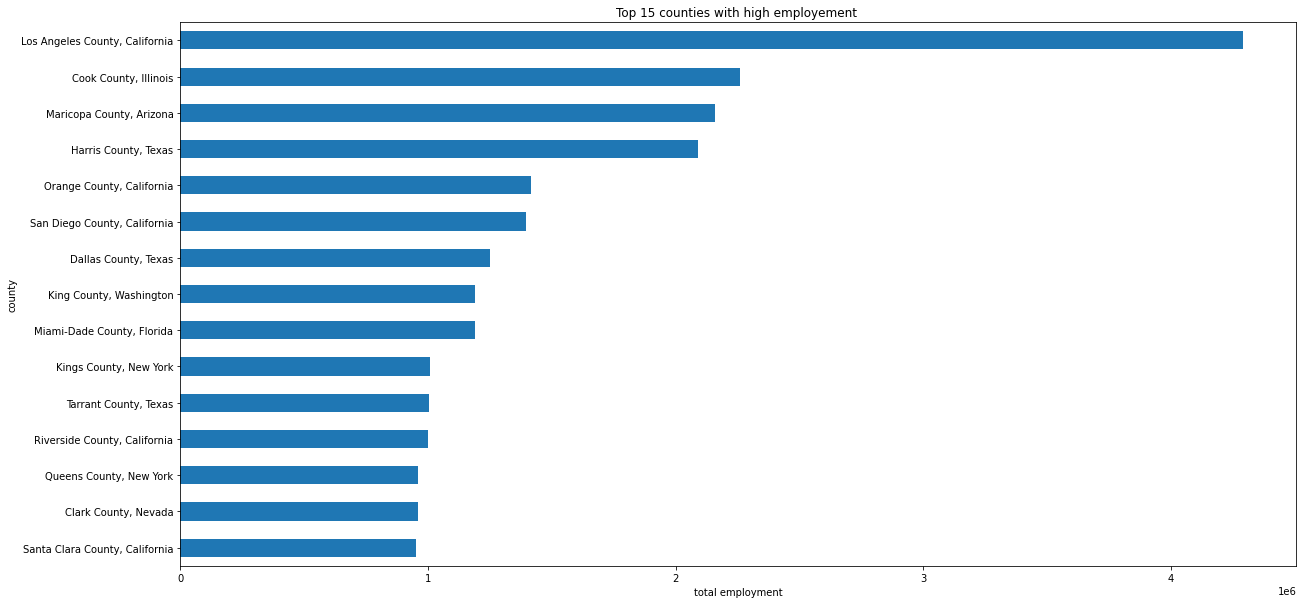

<Figure size 432x288 with 0 Axes>

In [24]:
high_employment.sort_values().plot(kind="barh",figsize=(20,10))
plt.title("Top 15 counties with high employement ") 
plt.ylabel("county")
plt.xlabel("total employment")
plt.show()
plt.tight_layout()


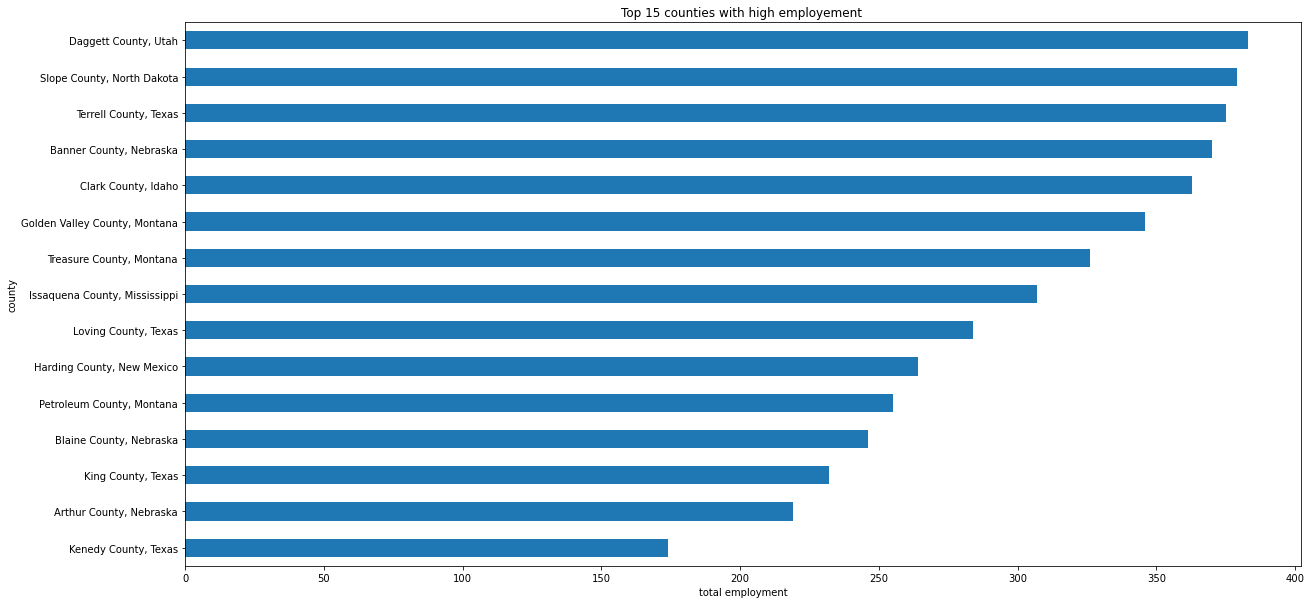

<Figure size 432x288 with 0 Axes>

In [25]:
low_employment.plot(kind="barh",figsize=(20,10))
plt.title("Top 15 counties with high employement ") 
plt.ylabel("county")
plt.xlabel("total employment")
plt.show()
plt.tight_layout()


In [26]:
# total labor force
total_laborforce = Employment_by_County_df.groupby(["county"]).sum()["labor_force"]
total_laborforce

county
Abbeville County, South Carolina     10124
Acadia Parish, Louisiana             23463
Accomack County, Virginia            16052
Ada County, Idaho                   257677
Adair County, Iowa                    4179
                                     ...  
Yuma County, Arizona                 98120
Yuma County, Colorado                 5604
Zapata County, Texas                  4600
Zavala County, Texas                  3430
Ziebach County, South Dakota           944
Name: labor_force, Length: 3125, dtype: int64

In [27]:
# counties with more labor force
total_laborforce.sort_values(ascending=False)

county
Los Angeles County, California    4921499
Cook County, Illinois             2539907
Maricopa County, Arizona          2331628
Harris County, Texas              2292759
Orange County, California         1553301
                                   ...   
Petroleum County, Montana             264
Blaine County, Nebraska               255
King County, Texas                    236
Arthur County, Nebraska               231
Kenedy County, Texas                  184
Name: labor_force, Length: 3125, dtype: int64

In [28]:
Avg_laborforce= Employment_by_County_df.groupby(['county']).mean()["labor_force"]
Avg_laborforce

county
Abbeville County, South Carolina     10124.0
Acadia Parish, Louisiana             23463.0
Accomack County, Virginia            16052.0
Ada County, Idaho                   257677.0
Adair County, Iowa                    4179.0
                                      ...   
Yuma County, Arizona                 98120.0
Yuma County, Colorado                 5604.0
Zapata County, Texas                  4600.0
Zavala County, Texas                  3430.0
Ziebach County, South Dakota           944.0
Name: labor_force, Length: 3125, dtype: float64

# unemployement data

<AxesSubplot:xlabel='population', ylabel='unemployed'>

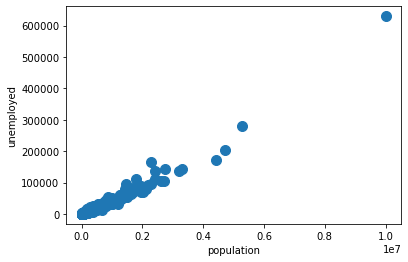

In [29]:
#plt.scatter(Employment_by_County_df.labor_force, Employment_by_County_df.employed, s=Employment_by_County_df.unemployed)
# OR (with pandas 0.13 and up)
Employment_by_County_df.plot(kind='scatter', x='population', y='unemployed',s=100)


In [30]:
Employment_by_County_with_state_df.head(5)

,index,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
0,0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama
1,1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama
2,2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama
3,3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama
4,4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama


In [31]:
unemployed_mean = Employment_by_County_with_state_df.groupby('state').mean()['unemployed']
unemployed_mean

state
 Alabama            1956.194030
 Alaska              647.090909
 Arizona           18804.600000
 Arkansas           1092.693333
 California        32711.719298
 Colorado           3051.596774
 Connecticut       18501.125000
 Delaware          12633.666667
 Florida           11664.119403
 Georgia            2081.559748
 Hawaii            10205.333333
 Idaho              1086.113636
 Illinois           5800.147059
 Indiana            2565.586957
 Iowa                885.454545
 Kansas              838.190476
 Kentucky           1118.741667
 Louisiana          2715.555556
 Maine              2299.125000
 Maryland           8937.916667
 Massachusetts     24877.153846
 Michigan           5760.409639
 Minnesota          2197.045977
 Mississippi        1241.560976
 Missouri           1613.417391
 Montana             567.660714
 Nebraska            470.881720
 Nevada            11556.294118
 New Hampshire      5091.400000
 New Jersey        20947.904762
 New Mexico         2229.375000
 N

<AxesSubplot:ylabel='state'>

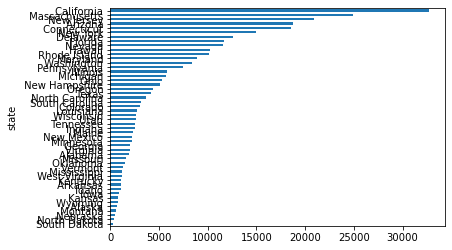

In [32]:
unemployed_mean.sort_values(ascending=True).plot(kind="barh")

# calculate unemployed % for states  

# Unemployment rate=(Unemployed people/Total labor force)×100

In [33]:
Employment_by_County_with_state_df.head(5)

,index,geoid,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
0,0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama
1,1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama
2,2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama
3,3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama
4,4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama


In [34]:
State_unemployed  = Employment_by_County_with_state_df.groupby(["state"]).sum()["unemployed"]
State_unemployed

state
 Alabama            131065
 Alaska              14236
 Arizona            282069
 Arkansas            81952
 California        1864568
 Colorado           189199
 Connecticut        148009
 Delaware            37901
 Florida            781496
 Georgia            330968
 Hawaii              30616
 Idaho               47789
 Illinois           591615
 Indiana            236034
 Iowa                87660
 Kansas              88010
 Kentucky           134249
 Louisiana          171080
 Maine               36786
 Maryland           214510
 Massachusetts      323403
 Michigan           478114
 Minnesota          191143
 Mississippi        101808
 Missouri           185543
 Montana             31789
 Nebraska            43792
 Nevada             196457
 New Hampshire       50914
 New Jersey         439906
 New Mexico          71340
 New York           928167
 North Carolina     363458
 North Dakota        20837
 Ohio               468803
 Oklahoma           113565
 Oregon             15

In [35]:
State_total_laborforce = Employment_by_County_with_state_df.groupby(["state"]).sum()["labor_force"]
State_total_laborforce

state
 Alabama            2230132
 Alaska              171336
 Arizona            3570219
 Arkansas           1354299
 California        18265120
 Colorado           2658197
 Connecticut        1872632
 Delaware            484359
 Florida           10114334
 Georgia            5072168
 Hawaii              207276
 Idaho               892157
 Illinois           6249150
 Indiana            3319018
 Iowa               1666424
 Kansas             1497013
 Kentucky           2019899
 Louisiana          2069735
 Maine               676547
 Maryland           3172798
 Massachusetts      3650658
 Michigan           4840849
 Minnesota          3094711
 Mississippi        1259356
 Missouri           3052710
 Montana             539886
 Nebraska           1035182
 Nevada             1530873
 New Hampshire       761730
 New Jersey         4495167
 New Mexico          846138
 New York           9289174
 North Carolina     4950868
 North Dakota        406849
 Ohio               5754292
 Oklahoma     

In [36]:
Unemployement_percent_statewise = (State_unemployed/State_total_laborforce)*100
Unemployement_percent_statewise

state
 Alabama            5.877006
 Alaska             8.308820
 Arizona            7.900608
 Arkansas           6.051249
 California        10.208353
 Colorado           7.117569
 Connecticut        7.903795
 Delaware           7.824981
 Florida            7.726618
 Georgia            6.525178
 Hawaii            14.770644
 Idaho              5.356568
 Illinois           9.467128
 Indiana            7.111561
 Iowa               5.260366
 Kansas             5.879040
 Kentucky           6.646322
 Louisiana          8.265792
 Maine              5.437316
 Maryland           6.760909
 Massachusetts      8.858759
 Michigan           9.876656
 Minnesota          6.176441
 Mississippi        8.084132
 Missouri           6.077977
 Montana            5.888095
 Nebraska           4.230367
 Nevada            12.833004
 New Hampshire      6.683996
 New Jersey         9.786199
 New Mexico         8.431249
 New York           9.991922
 North Carolina     7.341299
 North Dakota       5.121556
 Ohio   

In [37]:
#Unemployement_percent_statewise.to_csv('..//data_files/Unemployement_Percentage_states.csv')